In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv(r"census_income_original_2.csv")
df.head()

C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_4376\1426535629.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"census_income_original_2.csv")


,ID,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income,income_value
0,1,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,7986
1,2,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,4566
2,3,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,2571
3,4,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,8611
4,5,41,Private,Some-college,10,Separated,"Prof-,specialty",Own-child,White,Female,0,3900,40,United-States,<=50K,1553


In [312]:
import math

# Parameters
Z = 1.96
std_dev = 8853.58  
margin_of_error = 0.05 
effect_size = 0.15
k = 12

# Calculate population variance
variance = std_dev**2
n_regression = (Z**2 * variance) / (margin_of_error**2)

# Adjust sample size for multiple predictors
n_with_effect_size = (16 + 50 * k) / effect_size

# Output the results
print(f"Sample size without effect size adjustment: {math.ceil(n_regression)}")
print(f"Sample size with effect size adjustment: {math.ceil(n_with_effect_size)}")


Sample size without effect size adjustment: 31354351527
Sample size with effect size adjustment: 4107


In [184]:
def freedman(n,Q1, Q3, max_value, min_value):
    IQR = Q3 - Q1
    bin_width = 2 * (IQR / (n ** (1/3)))
    num_bins = (max_value - min_value) / bin_width
    return np.ceil(num_bins).astype(int)

n = 13190  
Q1 = 5758.25 
Q3 = 14505.75 
max_value = 32393
min_value = 1
k = freedman(n,Q1,Q3,max_value, min_value)
print(k)

44


count        17.000000
mean     100065.235294
std          44.139735
min      100001.000000
25%      100036.000000
50%      100054.000000
75%      100098.000000
max      100145.000000
Name: income_value, dtype: float64


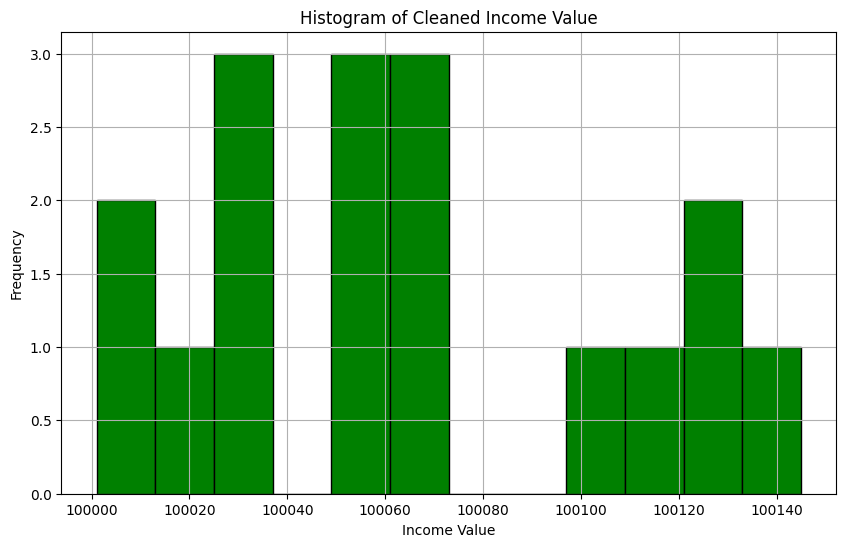

In [331]:
# Clean the data
income_value = df[df['income_value'] != '?'] 
income_value = income_value[income_value['income_value'].notnull()]  
income_value['income_value'] = pd.to_numeric(income_value['income_value'], errors='coerce')
income_value = income_value[income_value['income_value'] > 50000] 
income_value = income_value.dropna(subset=['income_value'])
print(income_value['income_value'].describe())

# Plot histogram of the cleaned 'income_value'
plt.figure(figsize=(10,6))
plt.hist(income_value['income_value'], bins=k, color='green', edgecolor='black')
plt.title('Histogram of Cleaned Income Value')
plt.xlabel('Income Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [123]:
columns = [
    "age", "capital.gain", "capital.loss", "hours.per.week", "income_value"
]

for column in columns:
    print(f"# Stats for {column}: {df[column].describe()}")
    print("\n")


# Stats for age: count    33333.000000
mean        38.711577
std         13.629015
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


# Stats for capital.gain: count    33333.000000
mean      1052.690247
std       7301.065532
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64


# Stats for capital.loss: count    33333.000000
mean       133.689347
std        500.905195
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64


# Stats for hours.per.week: count    33333.000000
mean        40.543245
std         12.365425
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64


# Stats for income_value: count              13190
unique 

In [65]:
columns = [
    "education.num", "education", "workclass", "occupation", "marital.status", 
    "relationship", "race", "Gender", "native.country", "income"
]

for column in columns:
    unique_values = df[column].unique()
    print(f"# Unique values for {column}:")
    print(unique_values)
    print("\n")

# Unique values for education.num:
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]


# Unique values for education:
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']


# Unique values for workclass:
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']


# Unique values for occupation:
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-,specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Prof-specialty'
 'Transport-moving' 'Handlers-cleaners' 'Sales' 'Farming-fishing'
 'Tech-support' 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


# Unique values for marital.status:
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']


# Unique values for relationship:
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']


81


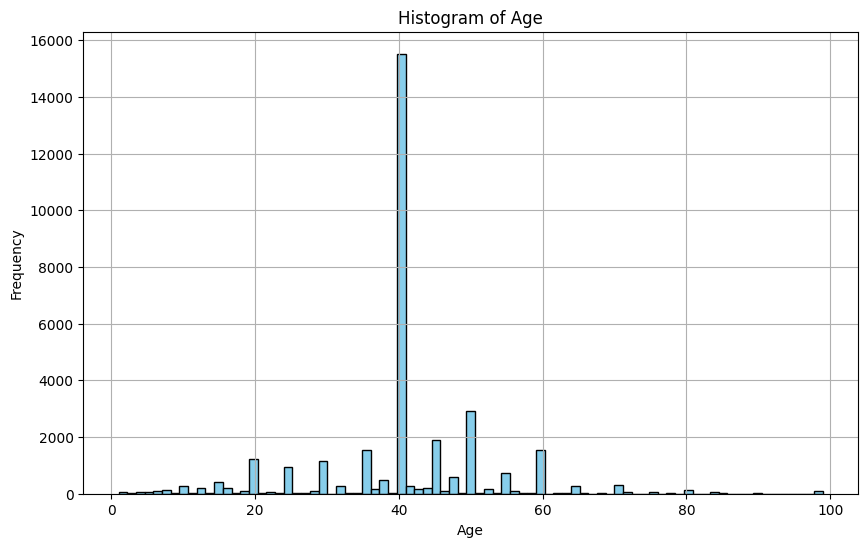

In [295]:
min_value = 17.000000
Q = 28.000000
Q3 = 48.000000
max_value = 90.000000
n = 33333
k = freedman(n,Q1,Q3,max_value, min_value)
print(k)

# Assuming 'df' is your DataFrame and 'age' is the column you want to plot
plt.figure(figsize=(10,6))
plt.hist(df['age'], bins=k, color='skyblue', edgecolor='black') 
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [198]:
from scipy import stats

# Perform a Chi-Square test between target_missing and an independent variable (e.g., 'age')
contingency_table = pd.crosstab(df['income_value'], df['hours.per.week'])
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}, p-value: {p_value}")
#age edunum hrs/w

Chi-Square Statistic: 848550.7656503536, p-value: 4.505466089313735e-22


In [254]:
import pandas as pd
from scipy import stats


# Replace with your actual population mean (e.g., 15000)
population_mean = 10160

# Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(income_value['income_value'], population_mean)

# Output the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Conclusion based on p-value (commonly, alpha = 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.")


T-statistic: 0.0036961129049811955
P-value: 0.9970509914354799
Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.


In [255]:
print(df['income_value'].isnull().sum())

20143


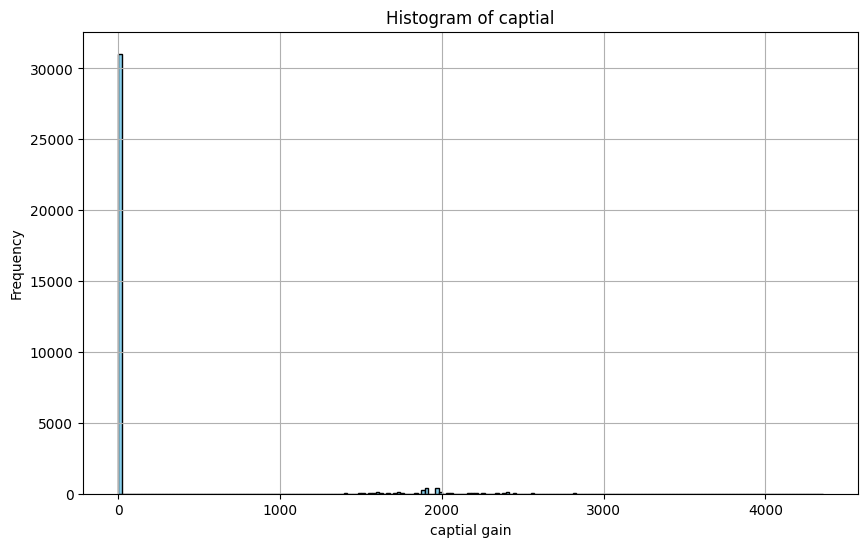

In [253]:
mean = 1052.690247
min_value = 0.000000
Q1 = 0.000000
Q3 = 0.000000
max_value = 99999.0000003
#k = freedman(n,Q1,Q3,max_value, min_value)
#print(k)

# Assuming 'df' is your DataFrame and 'age' is the column you want to plot
plt.figure(figsize=(10,6))
plt.hist(df['capital.loss'], bins=200, color='skyblue', edgecolor='black') 
plt.title('Histogram of captial')
plt.xlabel('captial gain')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


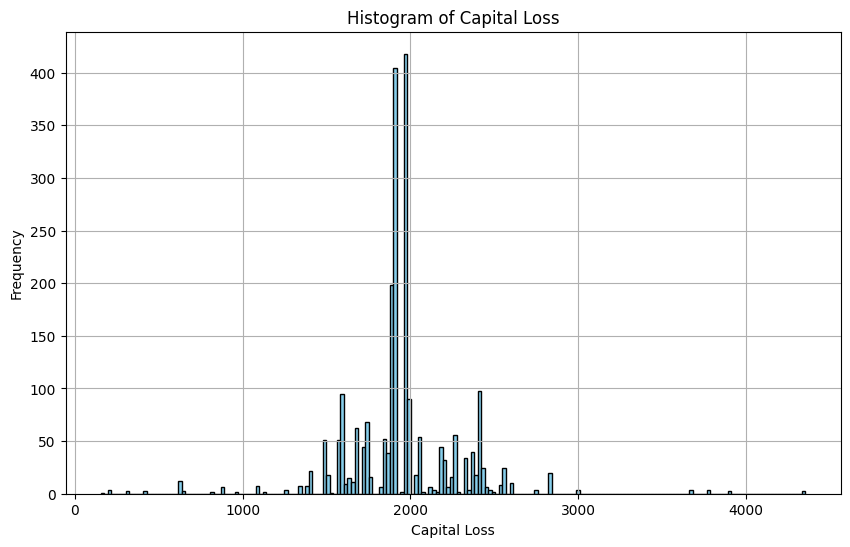

In [247]:
import matplotlib.pyplot as plt

# Filter out rows where 'capital.loss' is 0
df_filtered = df[df['capital.loss'] != 0]

# Plot the histogram
plt.figure(figsize=(10,6))
plt.hist(df_filtered['capital.loss'], bins=200, color='skyblue', edgecolor='black') 
plt.title('Histogram of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


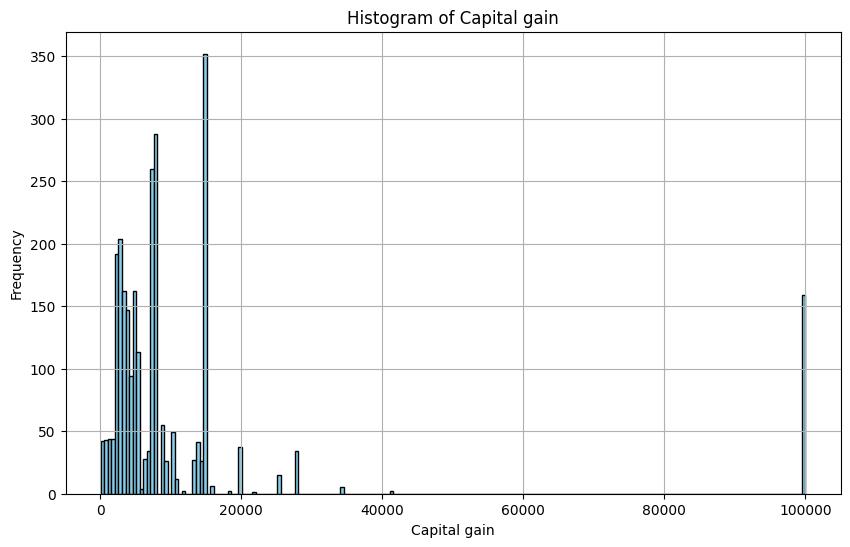

In [251]:
import matplotlib.pyplot as plt

# Filter out rows where 'capital.loss' is 0
df_filtered = df[df['capital.gain'] != 0]

# Plot the histogram
plt.figure(figsize=(10,6))
plt.hist(df_filtered['capital.gain'], bins=200, color='skyblue', edgecolor='black') 
plt.title('Histogram of Capital gain')
plt.xlabel('Capital gain')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


count     13133.000000
mean      10160.285550
std        8853.584197
min           0.050000
25%        4234.000000
50%        7644.000000
75%       14452.000000
max      100145.000000
Name: income_value, dtype: float64
object


C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_4376\3948291097.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age'] = pd.to_numeric(df_cleaned['age'], errors='coerce')
C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_4376\3948291097.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['income_value'] = pd.to_numeric(df_cleaned['income_value'], errors='coerce')


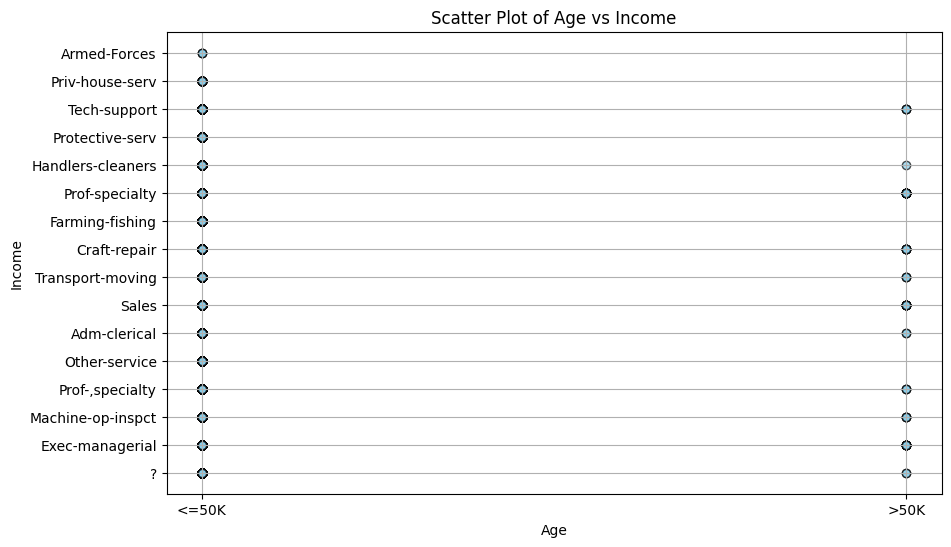

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Clean the data for income_value
income_value = df[df['income_value'] != '?']
income_value = income_value[income_value['income_value'].notnull()]  
income_value['income_value'] = pd.to_numeric(income_value['income_value'], errors='coerce')
income_value = income_value.dropna(subset=['income_value'])

# Ensure that 'income_value' is cleaned properly
print(income_value['income_value'].describe())

# Ensure there are no NaN values in 'age' and 'income_value' before plotting
df_cleaned = df.dropna(subset=['age', 'income_value'])  # Drop rows where 'age' or 'income_value' is NaN

# Check the types of columns to make sure 'income_value' is numeric
print(df_cleaned['income_value'].dtype)

# Convert both 'age' and 'income_value' explicitly to numeric types (int or float)
df_cleaned['age'] = pd.to_numeric(df_cleaned['age'], errors='coerce')
df_cleaned['income_value'] = pd.to_numeric(df_cleaned['income_value'], errors='coerce')

# Drop rows where conversion caused NaN values
df_cleaned = df_cleaned.dropna(subset=['age', 'income_value'])

# Scatter plot of age vs income
plt.figure(figsize=(10,6))
plt.scatter(df_cleaned['income'], df_cleaned['occupation'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Scatter Plot of Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.show()


In [325]:
# Calculate the correlation between 'age' and 'income_value'
correlation = df_cleaned[['capital.loss', 'income_value']].corr()

# Display the correlation matrix
print(correlation)


              capital.loss  income_value
capital.loss      1.000000     -0.156988
income_value     -0.156988      1.000000


In [270]:
from scipy.stats import pearsonr


correlation, p_value = pearsonr(df_cleaned['age'], df_cleaned['income_value'])
print('Pearson correlation:', correlation)
print('P-value:', p_value)

Pearson correlation: 0.0470962160502128
P-value: 6.676139454357925e-08


In [277]:
p_value < 0.05

True

In [285]:

correlation, p_value = pearsonr(df_cleaned['education.num'], df_cleaned['income_value'])
print('Pearson correlation:', correlation)
print('P-value:', p_value)

Pearson correlation: 0.006444776208461685
P-value: 0.4602081017923061


                correlation        p_value
ID                -0.222458  5.982642e-147
age                0.047096   6.676139e-08
education.num      0.006445   4.602081e-01
capital.gain       0.493256   0.000000e+00
capital.loss      -0.156988   3.107935e-73
hours.per.week     0.020886   1.668786e-02


In [292]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

# Assuming df_cleaned is your cleaned dataframe and has 'age' and 'income_value'

# Extract relevant columns
age = df_cleaned['age']
income = df_cleaned['income_value']

# Standardize the variables (mean = 0, std = 1)
scaler = StandardScaler()
df_cleaned[['age', 'income_value']] = scaler.fit_transform(df_cleaned[['age', 'income_value']])

# Calculate Pearson correlation between standardized 'age' and 'income_value'
correlation, p_value = pearsonr(df_cleaned['age'], df_cleaned['income_value'])

# Print results
print(f'Pearson correlation: {correlation}')
print(f'P-value: {p_value}')


Pearson correlation: 0.047096216050212705
P-value: 6.676139454358788e-08


In [288]:
df_cleaned['age'].describe()

count    1.313300e+04
mean    -2.164144e-16
std      1.000038e+00
min     -1.420120e+00
25%     -7.852957e-01
50%     -2.210073e-01
75%      6.254255e-01
max      3.729012e+00
Name: age, dtype: float64

In [289]:
df_cleaned['income_value'].describe()

count    1.313300e+04
mean    -1.731316e-17
std      1.000038e+00
min     -1.147628e+00
25%     -6.693912e-01
50%     -2.842218e-01
75%      4.847616e-01
max      1.016404e+01
Name: income_value, dtype: float64

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def scotts_bins(data):
    # Remove NaN, Inf, and -Inf values
    data = data.replace([np.inf, -np.inf], np.nan).dropna()
    bin_width = (3.5 * np.std(data)) / (len(data) ** (1/3))
    num_bins = int((np.max(data) - np.min(data)) / bin_width)
    return num_bins




def plot_histogram(df, col, bins=65):
    bins = scotts_bins(df[col])
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=bins, edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


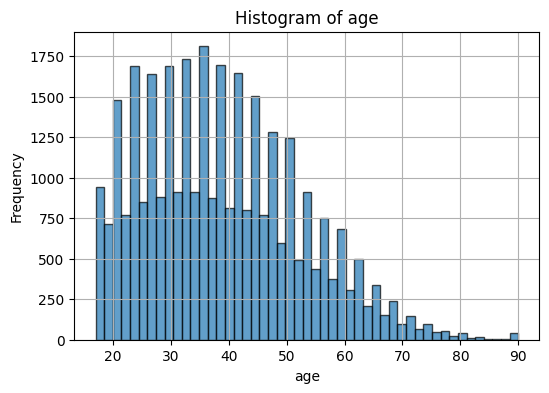

In [12]:
cont_cols = [ 'income_value', 'education.num', 'capital.gain', 'capital.loss', 'age', 'hours.per.week']
df2 = df[cont_cols].copy()

df2['income>50k'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df2['income_value'] = pd.to_numeric(df2['income_value'], errors='coerce')
df2 = df2[~((df2['income_value'] < 50000) & (df2['income>50k'] == 1))]
df2 = df2[~((df2['income_value'] >= 50000) & (df2['income>50k'] == 0))]

df2['capital.loss'] = df2['capital.loss'] * -1
df2['net_capital'] = df2['capital.gain'] + df2['capital.loss']
df2.drop(columns=['capital.gain', 'capital.loss'], inplace=True)

plot_histogram(df2, 'age' )

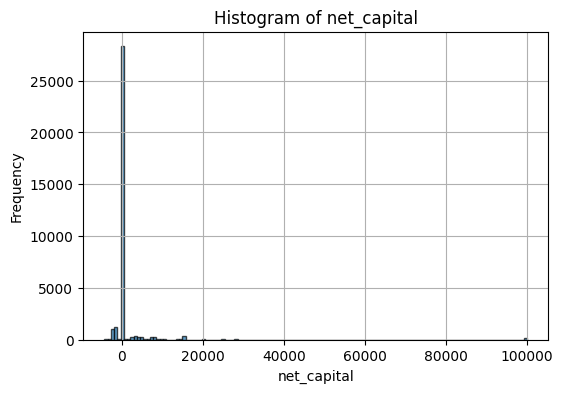

In [13]:
plot_histogram(df2, 'net_capital')

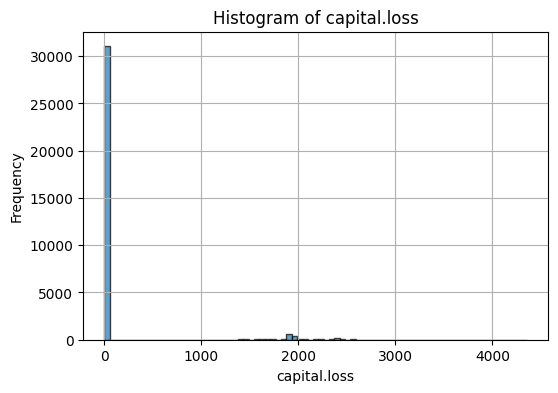

In [71]:
plot_histogram(df2, 'capital.loss', 65)

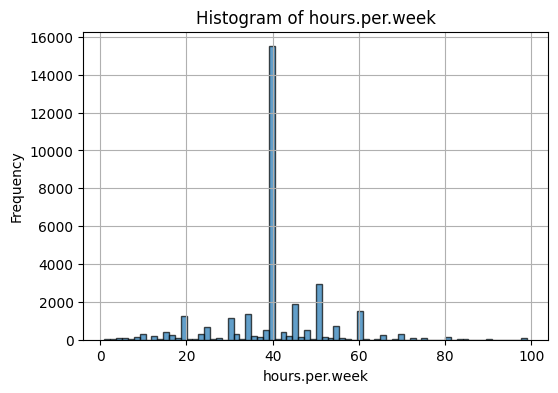

In [14]:
plot_histogram(df2, 'hours.per.week')

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot_with_outliers(df, col):

    # Extract the column data
    data = df[col].replace([np.inf, -np.inf], np.nan).dropna()

    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    outliers = data[(data < lower_whisker) | (data > upper_whisker)]

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data, color='lightblue', width=0.5)
    
    plt.scatter(outliers, np.zeros_like(outliers) + 1, color='red', label='Outliers', alpha=0.6)

    plt.title(f"Boxplot of {col} with Outliers Highlighted")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()

    plt.show()

    return outliers


In [19]:
import pandas as pd
import numpy as np

def calculate_zscores(df, col, threshold=3):
 
    data = df[col].replace([np.inf, -np.inf], np.nan).dropna()

    # Calculate the mean and standard deviation of the column
    mean = np.mean(data)
    std_dev = np.std(data)

    # Calculate the Z-scores for the data
    z_scores = (data - mean) / std_dev

    # Identify outliers based on the threshold
    outliers = data[np.abs(z_scores) > threshold]

    return z_scores, outliers


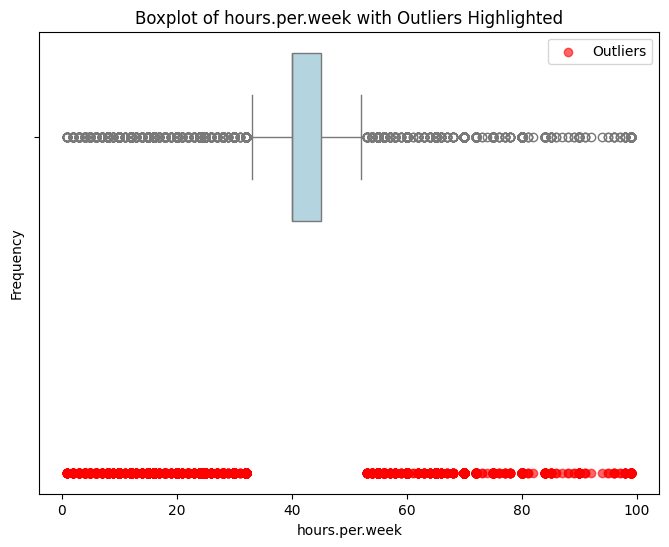

1        18
7        20
9        60
12       20
13       55
         ..
33318    60
33319    70
33320    55
33326    55
33331    67
Name: hours.per.week, Length: 9217, dtype: int64

In [22]:
plot_boxplot_with_outliers(df, 'hours.per.week')

In [21]:
calculate_zscores(df, 'age', threshold=3)


(0        3.763235
 1        3.176244
 2        2.002260
 3        1.121772
 4        0.167911
            ...   
 33328    0.828276
 33329   -0.345707
 33330    1.415268
 33331    1.268520
 33332   -0.345707
 Name: age, Length: 33333, dtype: float64,
 0        90
 1        82
 118      83
 128      81
 199      90
          ..
 32500    82
 32528    81
 32675    83
 32685    81
 32756    90
 Name: age, Length: 124, dtype: int64)